In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
y_train[1]

0

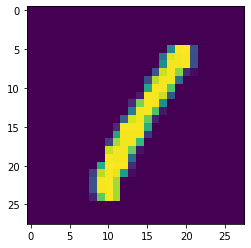

In [9]:
plt.imshow(X_train[3])

In [10]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [11]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [12]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [15]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2388 - accuracy: 0.9507 - val_loss: 0.0809 - val_accuracy: 0.9767
Epoch 2/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0686 - accuracy: 0.9785 - val_loss: 0.1008 - val_accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0905 - val_accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.1094 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 0.1102 - val_accuracy: 0.9768


In [16]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.11019837856292725, 0.9768000245094299]


In [17]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 70ms/step
[[6.6900520e-11 9.0908419e-23 1.2906379e-11 2.1161386e-09 1.7687716e-16
  1.4066249e-17 1.8106551e-23 1.0000000e+00 2.5802787e-14 1.9363233e-12]
 [2.6505734e-10 1.6316944e-10 1.0000000e+00 2.2656573e-12 2.9482525e-12
  2.1521669e-16 4.3862546e-11 1.6694482e-15 1.3329954e-10 1.0743877e-22]
 [2.1769868e-09 9.9999976e-01 1.1307897e-07 2.7135996e-14 1.0186930e-07
  2.1133670e-09 2.4829599e-13 9.3656078e-09 1.9697254e-08 6.7642732e-12]
 [1.0000000e+00 2.9783885e-20 5.1663020e-14 9.7627893e-18 3.7077021e-17
  3.7988039e-15 6.4331538e-16 1.0685299e-12 4.0841417e-16 1.5201262e-10]]


In [18]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
model.save("model.h5")

In [20]:
model=load_model("model.h5")